# **Цель: применить на практике методы по оценке качества данных**

**Описание задания:**
В домашней работе необходимо провести очистку данных на примере датасета с информацией о пассажирах корабля Титаник. Данные можно скачать по ссылке или найти в материалах к уроку. На полученных данных обучите модель классификации, с целевым признаком Survived (1 – пассажир выжил, 0 – погиб). Обучите модель на необработанных данных и посчитайте метрику качества. Проведите очистку данных. Обучите модель на данных после обработки, посчитайте метрику качества. Сравнить полученные результаты. Значение метрики должно улучшиться.

# Этапы работы:

***1. Получите и загрузите данные.***

In [ ]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve

In [163]:
df = pd.read_csv('https://raw.githubusercontent.com/W1llAnn/file_for_hwork/main/train.csv', delimiter=',')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Посмотрим общую статистику по датасету:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Что мы видим:
*   Всего строк 891
*   Всего столбцов 12, из них с float64 2 столбца, int64 5 столбцов, object 5 столбцов
*   Пропуски есть в колонках: Age, Cabin, Embarked

Теперь про названия столбцов:

*   PassengerId - ID пассажира
*   Survived - Выжил ли пассажир или умер
*   Pclass - Показывает класс, которым следовал пассажир
*   Name - Имя пассажира
*   Sex - Пол
*   Age - Возраст
*   SibSp - Число братьев, сестер или супругов на борту у человека
*   Parch - Количество родителей или детей, с которыми путешествовал каждый пассажир
*   Fare - Тариф за проезд
*   Cabin - Кабина пассажира
*   Embarked - Порт посадки пассажира



---



---



---



***2. Удалите все пропущенные значения и категориальные переменные. Обучите модель. Выберете и посчитайте метрику качества.***

Сначала сделаем копию нашего DataFrame

In [ ]:
df_drop = df.copy()

Если мы просто удалим пропуски, без удаления категориальных признаков, то количество данных сильно сократится:

In [ ]:
df_drop.dropna(inplace=True)

In [ ]:
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB


In [ ]:
print(f'всего удалено данных {round(100-(183/891*100), 2)}% от общего датасета')

всего удалено данных 79.46% от общего датасета


*Осталось всего 183 строки и удалено 79,46% данных, но мы продолжим*

Уберем сначала все категориальные признаки (Name, Sex, Ticket, Cabin, Embarked), а потом пропущенные значения:

In [ ]:
df_drop = df_drop.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1)

И почистим от пропусков

In [ ]:
df_drop.dropna(inplace=True)

In [ ]:
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Pclass       714 non-null    int64  
 3   Age          714 non-null    float64
 4   SibSp        714 non-null    int64  
 5   Parch        714 non-null    int64  
 6   Fare         714 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 44.6 KB


In [ ]:
print(f'всего удалено данных {round(100-(714/891*100), 2)}% от общего датасета')

всего удалено данных 19.87% от общего датасета


*Осталось всего 714 строк и удалено 19,87% данных, теперь перейдем к модели*

In [ ]:
X = df_drop[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
y = df_drop['Survived']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

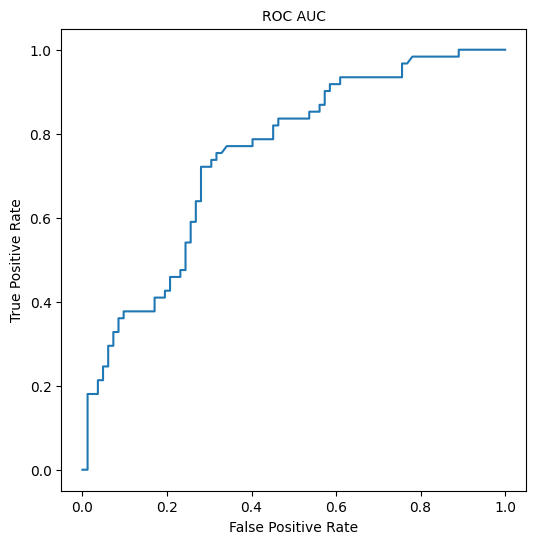

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict_proba(X_test)
fpr, tpr, thresh = roc_curve(y_test, predictions[:,1])
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr)
plt.title('ROC AUC', fontdict={'fontsize': 10})
plt.xlabel('False Positive Rate', fontdict={'fontsize': 10})
plt.ylabel('True Positive Rate', fontdict={'fontsize': 10})
plt.show()

In [ ]:
roc_auc_score(y_test, predictions[:, 1])

0.7479008396641343



---



---



---



***3. Снова загрузите полные данные.***

Мы сделаем вторую копию нашего DataFrame


In [164]:
df_fil = df.copy()
df_fil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB




---



---



---



***4. Удалите признаки, которые логически не нужны для построения модели. Обоснуйте.***

Логически не нужно нам:
*   PassengerId, это Идентификатор пассажира, нет взаимосвязи выжил/невыжил пассажир
*   Name, так как это Имя пассажира, что тоже не дает нужной нам информации
*   Ticket, так как это только номер билета, что тоже не дает нужной нам информации
*   Cabin - Кабина пассажира

In [165]:
df_fil = df_fil.drop(['Name', 'Ticket', 'Cabin'], axis=1)

In [166]:
df_fil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB




---



---



---



***5. Проверьте данные на наличие пропущенных значений.***
1.   Посчитайте, какой процент данных будет потерян, если просто удалить пропуски.
2.   Заполните пропуски: средним значением; константой; классом, указывающим на то, что значение было пропущено; случайным числом. Для разных признаков используйте подходящий метод. Можно не использовать все перечисленные методы.

In [167]:
print(f'Если просто удалить пропущенные данные: {round(100-(183/891*100), 2)}% потери от общего датасета')
print(f'Если убрать категориальные признаки, а потом удалить пропущенные данные: {round(100-(714/891*100), 2)}% потери от общего датасета')

Если просто удалить пропущенные данные: 79.46% потери от общего датасета
Если убрать категориальные признаки, а потом удалить пропущенные данные: 19.87% потери от общего датасета


Так как с пропущенным значением у нас только Age и Embarked, то заполним пропуски

In [168]:
# заполним медианой
df_fil['Age'] = df_fil['Age'].fillna(df['Age'].median())

In [169]:
#заполним модой
df_fil.Embarked.fillna(df_fil.Embarked.mode()[0], inplace = True)

In [170]:
df_fil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


Все пропуски заполнены, продолжаем работать



---



---



---



***6. Категориальные переменные переведите в цифровые значения. Можно использовать pd.get_dummies, preprocessing.LabelEncoder. Старайтесь не использовать для этой задачи циклы***

Нужно перевести только Sex и Embarked, приступим:

In [171]:
df_fil['Sex'] = LabelEncoder().fit_transform(df_fil['Sex'])

male = 1, female = 0

In [172]:
df_fil = pd.get_dummies(df_fil, columns=['Embarked'])

Смотрим что получилось:

In [173]:
df_fil.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,1,22.0,1,0,7.2500,0,0,1
1,2,1,1,0,38.0,1,0,71.2833,1,0,0
2,3,1,3,0,26.0,0,0,7.9250,0,0,1
3,4,1,1,0,35.0,1,0,53.1000,0,0,1
4,5,0,3,1,35.0,0,0,8.0500,0,0,1




---



---



---



***7. Проверьте данные на наличие выбросов.***
*   Удалите выбросы, если считаете это целесообразным. Обоснуйте.

In [ ]:
import scipy.stats as stats

z = np.abs(stats.zscore(df_fil))
data_clean = df_fil[(z<3).all(axis=1)]
data_clean

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...
884,0,3,1,25.0,0,0,7.0500,0,0,1
886,0,2,1,27.0,0,0,13.0000,0,0,1
887,1,1,0,19.0,0,0,30.0000,0,0,1
888,0,3,0,28.0,1,2,23.4500,0,0,1


In [ ]:
print(f'Обнаружено выбросов: {891 - 749}')

Обнаружено выбросов: 142


Z-оценка показывает, сколько стандартных отклонений данного значения от среднего, но нет гарантии что выбросы не ложные. Сейчас мы не узнаем были ли (например) ошибки при заполнении данных.

Я не буду удалять выбросы, так как это приведет к значительной потере объема данных



---



---



---



***8. Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака)***

Теперь про названия столбцов:

*   PassengerId - ID пассажира
*   Survived - Выжил ли пассажир или умер
*   Pclass - Показывает класс, которым следовал пассажир
*   Name - Имя пассажира
*   Sex - Пол
*   Age - Возраст
*   SibSp - Число братьев, сестер или супругов на борту у человека
*   Parch - Количество родителей или детей, с которыми путешествовал каждый пассажир
*   Fare - Тариф за проезд
*   Cabin - Кабина пассажира
*   Embarked - Порт посадки пассажира

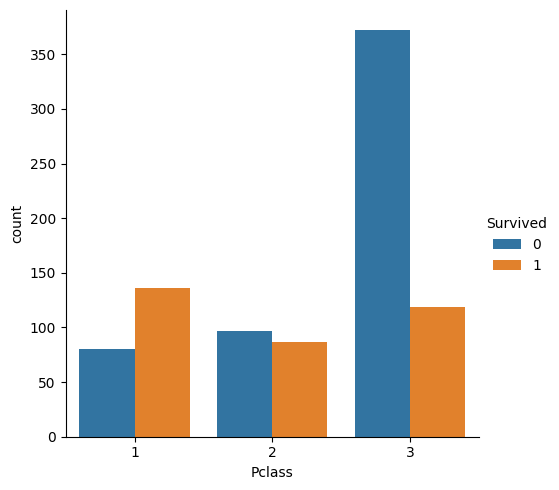

In [ ]:
sns.catplot(x ="Pclass", hue ="Survived",
kind ="count", data = df)

Из графика видно, что пассажиры первого класса имели больше шансов на выживание, чем трерьего класса

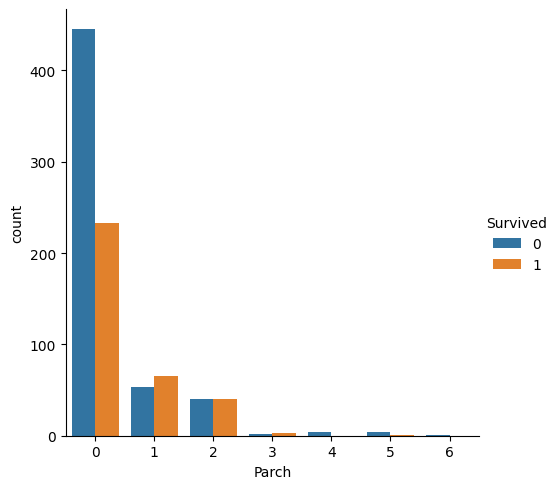

In [ ]:
sns.catplot(x ="Parch", hue ="Survived",
kind ="count", data = df)

Из графика видно, что количество выживших путешественников-одиночек выше, чем путешественников с семьей

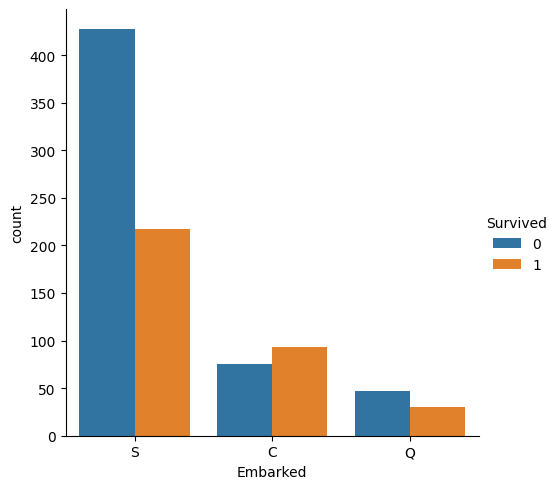

In [ ]:
sns.catplot(x ="Embarked", hue ="Survived",
kind ="count", data = df)

Из графика видно, что процент выживших больше у тех, кто сел в городе С



---



---



---



***9. Попробуйте математически преобразовать признак Age.***

Будем преобразовывать признак Age путем деления его на три категории - до 14 лет, от 14 до 30 лет и старше 30 лет

Оригинальная выборка:

In [154]:
df['Age'] = df['Age'].apply(lambda x: 0 if x <= 14 else (1 if x > 14 and x <= 30 else (3 if x > 30 else 'unknown' )))
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,1,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,3,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,1,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,3,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,3,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,1,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,1,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,unknown,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,1,0,0,111369,30.0000,C148,C


Выборка для обучения:

In [155]:
df_fil['Age'] = df_fil['Age'].apply(lambda x: 0 if x <= 14 else (1 if x > 14 and x <= 30 else (3 if x > 30 else 'unknown' )))
df_fil

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,1,1,0,7.2500,0,0,1
1,1,1,0,3,1,0,71.2833,1,0,0
2,1,3,0,1,0,0,7.9250,0,0,1
3,1,1,0,3,1,0,53.1000,0,0,1
4,0,3,1,3,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,1,0,0,13.0000,0,0,1
887,1,1,0,1,0,0,30.0000,0,0,1
888,0,3,0,1,1,2,23.4500,0,0,1
889,1,1,1,1,0,0,30.0000,1,0,0




---



---



---



***Обучите ту же модель, что в п. 2 на преобразованных данных. Посчитайте ту же, что в п. 2 метрику.***

In [174]:
df_fil = df_fil.drop(['PassengerId'], axis=1)

In [140]:
df_fil.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1


In [146]:
X2 = df_fil.loc[:, df_fil.columns != 'Survived']
y2 = df_fil['Survived']

In [147]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


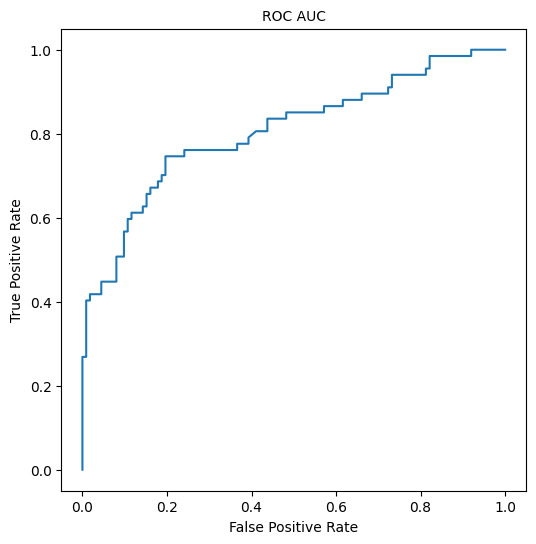

In [148]:
model = LogisticRegression()
model.fit(X2_train, y2_train)
predictions = model.predict_proba(X2_test)
fpr, tpr, thresh = roc_curve(y2_test, predictions[:,1])
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr)
plt.title('ROC AUC', fontdict={'fontsize': 10})
plt.xlabel('False Positive Rate', fontdict={'fontsize': 10})
plt.ylabel('True Positive Rate', fontdict={'fontsize': 10})
plt.show()

In [150]:
roc_auc_score(y2_test, predictions[:, 1])

0.8065031982942431



---



---



---



# Сформулируйте выводы по проделанной работе.


1.   Кратко опишите какие преобразования были сделаны и почему
2.   Сравните метрики моделей из п. 2 и п. 10.
3.   Напишите свое мнение о целесообразности работы с данными при построении моделей машинного обучения. *Нужно ли аналогичным образов исследовать и дополнять действительно большие данные?



1. В выборке мы убрали колонки PassengerId (Идентификатор пассажира), Name (Имя), Ticket (номер билета), Cabin (Кабина пассажира), так как это напрямую не взаимосвязано с выжил/не выжил пассажир. И преобразовали Sex и Embarked из категориальных переменных в цифровые значения.

2. Удаление пропусков данных приводит к потере качества модели, что видно из сравнения метрик качества. В общем, лучше заменить пропуски на какие-то значения, что повысит качество модели.

3. Я думаю, нужно исходить и первичного анализа данных и возможно, стоит поискать взаимосвязь (например посмотреть корреляцию) чтобы понять насколько эти данные могут влиять на конечный результат.